In [1]:
# Loading the necessary libraries
import sys
import matplotlib.pyplot as plt
from keras.models import load_model, Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [2]:
# Loading the training and testing dataset
def load_spam_data(file):
    # Loading data from the file into our dataframe after removing the header 
    df = pd.read_csv(file, header=None)
    
    # Seperating the features and target values 
    X = df.iloc[:, 0:df.shape[1]-1] # All the columns
    Y = df.iloc[:, df.shape[1]-1] # 1 or 0 values of the last column (i.e. spam or not spam)
    
    # Separating the training and testing set (30%) maintaining the class proportion.
    # Stratified sampling is used here to ensure that the relative class frequencies
    # is preserved in each training and validation.
    # The int (e.g. 0 or 42) passed onto random_state argument has an effect on the reproducibility of the results.
    trainX, testX, trainY, testY = train_test_split(X, Y, stratify=Y, test_size=0.3, random_state=42)
    
    # Normalizing the input dataframe using using basic statistics
    trainX = (trainX-trainX.mean()) / trainX.std()
    testX = (testX-testX.mean()) / testX.std()
    
    # Returning the result after converting the input dataframe into numpy array   
    return trainX.values, np.ravel(trainY), testX.values, np.ravel(testY)


# Defining the Sequencial model and adding layers
def define_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(57,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    #Nesterov momentum is applied to further accelerate gradient descent and dampen oscillation
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['acc'])
    
    return model


# Plotting the training and validation losses
def plotLosses(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(train_loss)+1)
    plt.plot(epochs, train_loss, 'k', label='Training Loss')    # Black line
    plt.plot(epochs, val_loss, 'bo', label='Validation Loss')     # Blue dots
    plt.title('Training and Validation Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    plt.savefig('Training_loss.png')
    plt.show()
    
    
# Plotting the training and validation accuracies
def plotAccs(history):
    train_acc = history.history['acc']
    val_acc = history.history['val_acc']
    epochs = range(1, len(train_acc)+1)
    plt.plot(epochs, train_acc, 'k', label='Training Accuracy')    # Black line
    plt.plot(epochs, val_acc, 'bo', label='Validation Accuracy')     # Blue dots
    plt.title('Training and Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()
    plt.savefig('Training_acc.png')
    plt.show()

In [3]:
# Building, running and evaluating the model
def run_model():
    trainX, trainY, testX, testY = load_spam_data('spambase.data')
    
    # Defining the model
    model = define_model()
    
    # Fitting the model
    history = model.fit(trainX, trainY, epochs=65, batch_size=256, validation_split=0.3)
    
    # Evaluating the model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('Accuracy = %.3f' % (acc * 100.0) + '%')
    
    # The learning curves
    plotLosses(history)
    plotAccs(history)
    
    model.save('spambase_model.h5')

Epoch 1/65
9/9 [==============================] - 1s 48ms/step - loss: 0.7343 - acc: 0.5014 - val_loss: 0.6107 - val_acc: 0.6760
Epoch 2/65
9/9 [==============================] - 0s 4ms/step - loss: 0.5928 - acc: 0.6894 - val_loss: 0.5216 - val_acc: 0.7464
Epoch 3/65
9/9 [==============================] - 0s 4ms/step - loss: 0.4994 - acc: 0.7780 - val_loss: 0.4410 - val_acc: 0.8499
Epoch 4/65
9/9 [==============================] - 0s 4ms/step - loss: 0.4269 - acc: 0.8703 - val_loss: 0.3768 - val_acc: 0.8903
Epoch 5/65
9/9 [==============================] - 0s 4ms/step - loss: 0.3710 - acc: 0.8812 - val_loss: 0.3294 - val_acc: 0.8986
Epoch 6/65
9/9 [==============================] - 0s 4ms/step - loss: 0.3350 - acc: 0.8996 - val_loss: 0.2957 - val_acc: 0.9079
Epoch 7/65
9/9 [==============================] - 0s 4ms/step - loss: 0.3121 - acc: 0.9010 - val_loss: 0.2722 - val_acc: 0.9151
Epoch 8/65
9/9 [==============================] - 0s 4ms/step - loss: 0.2784 - acc: 0.9135 - val_loss: 

9/9 [==============================] - 0s 4ms/step - loss: 0.1140 - acc: 0.9568 - val_loss: 0.1629 - val_acc: 0.9451
Epoch 65/65
9/9 [==============================] - 0s 4ms/step - loss: 0.1119 - acc: 0.9643 - val_loss: 0.1625 - val_acc: 0.9462
Accuracy = 92.831%


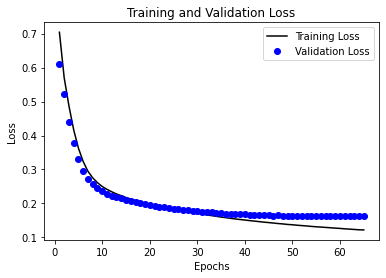

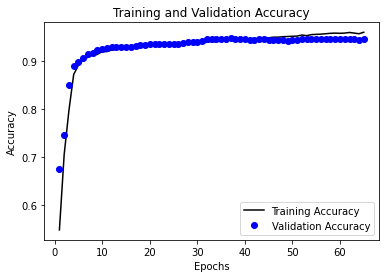

In [4]:
# Running the model
run_model()

In [5]:
# Evaluating the final model on our test data
trainX, trainY, testX, testY = load_spam_data('spambase.data')
final_model = load_model('spambase_model.h5')
_, acc = final_model.evaluate(testX, testY, verbose=0)

print('Accuracy = %.2f' % (acc * 100.0) + '%')
#print('')

Accuracy = 92.83%
